In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 顧客(卸売業者)のデータセットの読み込み(販売経路、所在地、年間注文額)
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
# カテゴリ変数はクラスタリングでは扱えないため削除
del(dataset['Channel'])
del(dataset['Region'])
dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [8]:
# 全ての変数における1を同等に扱えるようにするため、標準化する必要がある
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
# fit_transformメソッドでdatasetの平均や標準偏差など統計情報の取得と書き換えを同時に
X_std = std.fit_transform(dataset)
print('X_stdのshape', X_std.shape)
print(X_std.mean()) # e-18は10の-18乗の意
print(X_std.std())
# 標準化は変数ごとに行われていることに注意

X_stdのshape (440, 6)
-8.07434927e-18
1.0


In [9]:
# 標準化が変数ごとに行われていることの確認
num = X_std.shape[1]-1
while num >-1:
    # 平均と標準偏差を計算
    print('平均',X_std[:,num].mean())
    print('標準偏差',X_std[:,num].std(), '\n')
    num -= 1

平均 -8.07434927e-18
標準偏差 1.0 

平均 2.422304781e-17
標準偏差 1.0 

平均 3.6334571715e-17
標準偏差 1.0 

平均 -4.037174635e-17
標準偏差 1.0 

平均 0.0
標準偏差 1.0 

平均 -3.43159843975e-17
標準偏差 1.0 



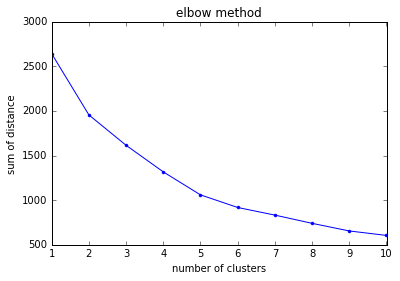

In [10]:
# エルボー法を使って最適なクラスタ数を調べる
distances = [] # 各クラスター数ごとのsseを格納しておくための配列を定義
for i in range(1,11): # 10回for文を繰り返す
    km = KMeans(n_clusters=i,
               random_state=0)
    km.fit(X_std)
    distances.append(km.inertia_) # sseを配列に追加
plt.plot(range(1,11), distances, marker='.')
plt.xlabel('number of clusters')
plt.ylabel('sum of distance')
plt.title('elbow method')
plt.show()

In [11]:
#肘の部分がわかりづらいが5と仮定して進める
# データセットのクラスタリングへ
km = KMeans(n_clusters=5, random_state=0)
y = km.fit_predict(X_std)
print(y)

[3 1 1 3 0 3 3 3 3 1 1 3 0 1 1 3 1 3 3 3 3 3 0 1 1 3 3 3 1 0 3 3 3 0 3 3 0
 1 1 0 0 3 1 1 3 1 1 4 1 1 3 3 0 1 0 3 4 1 3 3 3 4 3 1 3 4 3 1 3 3 0 1 3 0
 3 3 3 1 3 3 3 1 1 3 3 4 4 0 3 0 3 3 4 0 1 3 3 3 3 3 1 1 3 0 3 3 1 1 3 1 3
 1 0 3 3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 1 3 3
 3 0 3 3 3 3 3 1 1 3 3 1 1 3 3 1 3 1 1 3 3 3 1 1 3 1 3 1 0 3 3 3 3 0 1 2 3
 3 3 3 1 1 3 3 3 1 3 0 0 1 3 3 1 1 0 3 3 1 3 3 3 1 3 4 3 3 1 1 1 3 1 3 3 1
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 1 1 3 3 3 3 3 4 3 0 1 0 3 3 0
 0 3 3 3 3 1 1 1 3 1 3 3 3 3 0 3 3 0 0 3 3 3 3 0 0 0 0 3 3 3 0 3 3 3 1 3 3
 3 3 3 3 3 1 1 1 1 1 1 3 3 1 3 0 1 3 3 1 3 3 3 1 3 3 3 3 3 0 3 3 3 3 3 1 3
 4 0 0 3 3 3 3 1 1 3 1 3 3 1 0 3 1 3 1 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
 0 0 3 3 3 3 1 0 3 3 0 0 0 3 1 3 3 3 3 3 3 3 3 0 3 3 1 3 3 3 3 0 3 3 3 3 0
 1 3 3 3 3 3 0 3 3 1 3 1 3 1 3 3 3 3 0 1 0 3 3 3 0 3 3 3 0 0 1 3 3]


In [12]:
centroids = km.cluster_centers_
print(centroids)
print(centroids.shape)

[[  1.67032632e+00  -1.07977956e-01  -2.49633515e-01   1.09385904e+00
   -4.17830521e-01   2.58987677e-01]
 [ -4.83027024e-01   6.87234312e-01   9.29712635e-01  -3.19705333e-01
    9.12956880e-01   1.61406680e-01]
 [  1.96681731e+00   5.17550306e+00   1.28721685e+00   6.90059988e+00
   -5.54861977e-01   1.64784475e+01]
 [ -2.37815908e-01  -3.79628084e-01  -4.30402618e-01  -1.67549707e-01
   -3.91270763e-01  -1.96169591e-01]
 [  3.13830315e-01   3.92190593e+00   4.27561037e+00  -3.57419457e-03
    4.61816580e+00   5.03365339e-01]]
(5, 6)


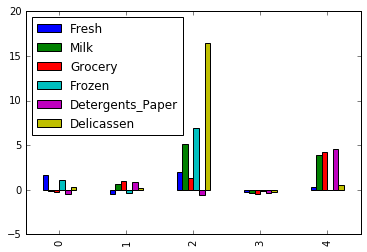

In [14]:
# 重心値から棒グラフを作成する
pd_centroids = pd.DataFrame(centroids, columns=dataset.columns)
pd_centroids.plot.bar()
plt.show()

In [16]:
# クラスタ内の分布数を確認
from collections import Counter
Counter(y)

Counter({0: 63, 1: 95, 2: 1, 3: 271, 4: 10})

In [17]:
# クラスタ2は外れ値1つしか含まれない例外的なクラスタ
# クラスタ4に属する企業は他の企業があまり仕入れてないdetergents_paperを多く仕入れている
# クラスタ0は冷凍食品の仕入れが他と比べると大きい